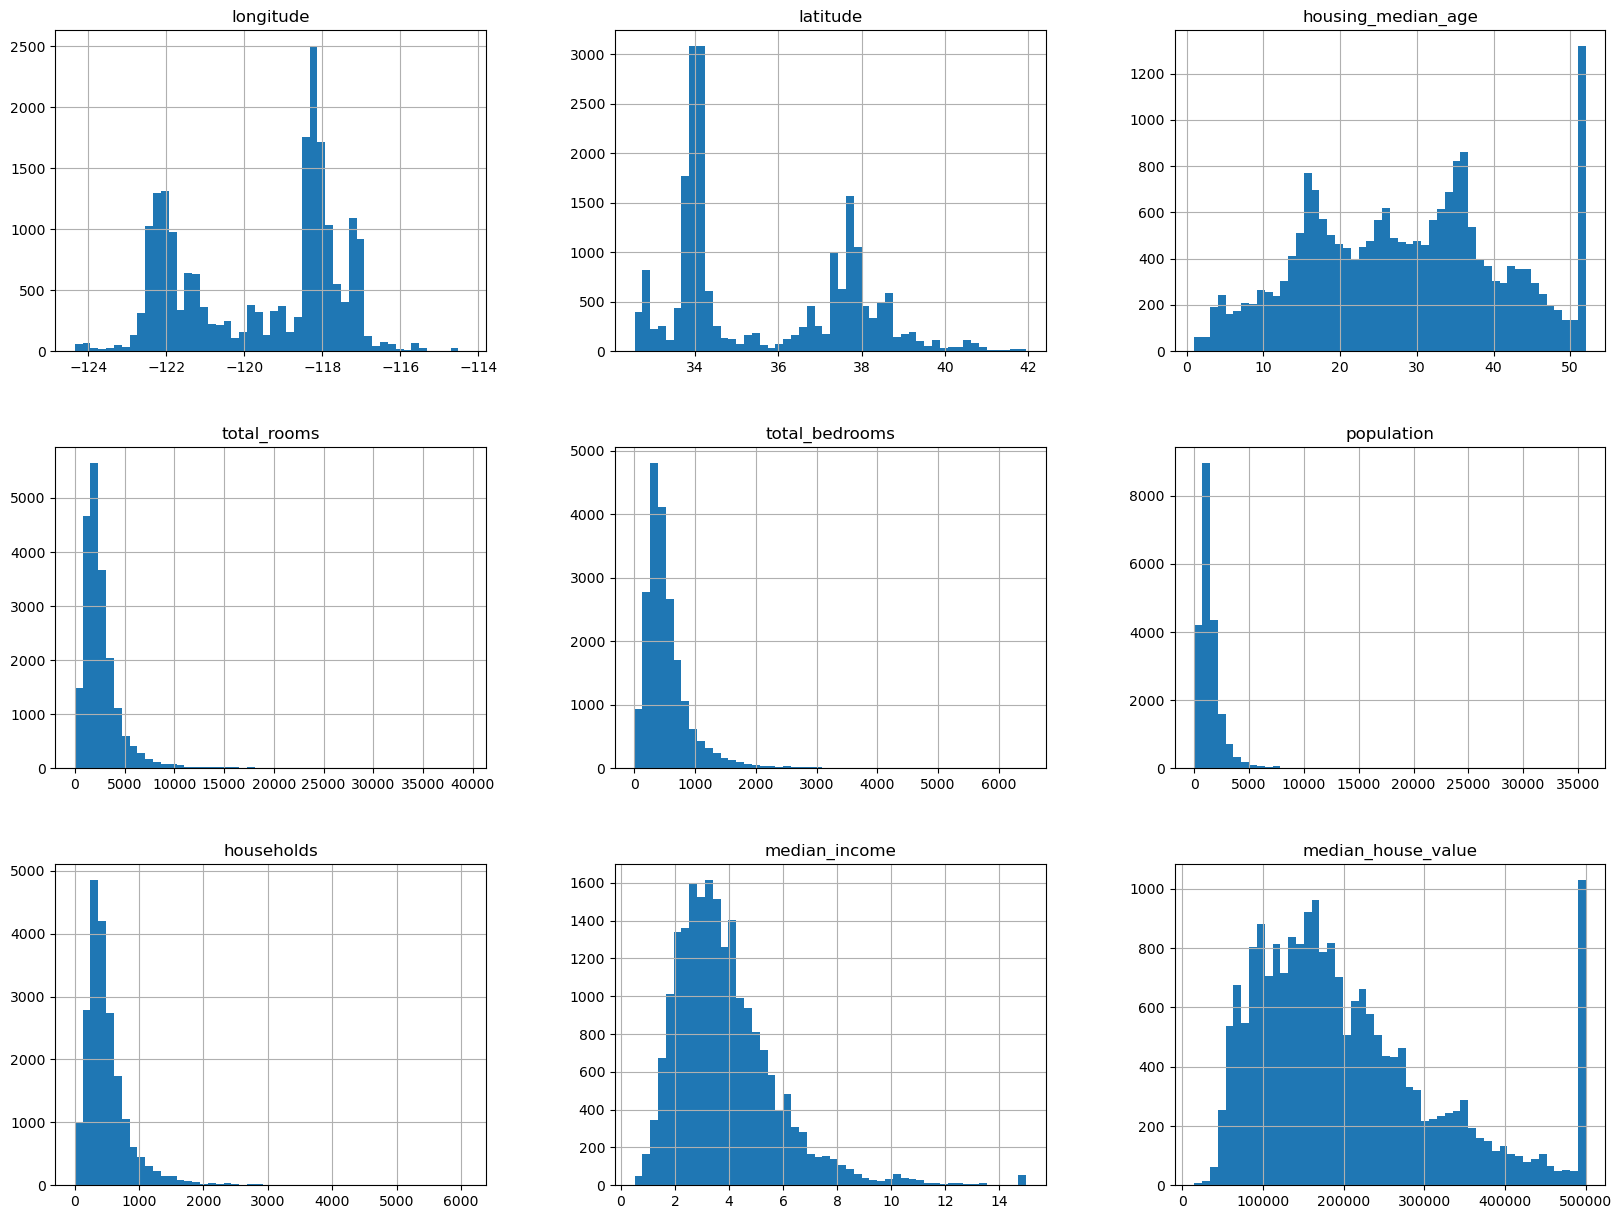

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15062,-116.96,32.80,16.0,3920.0,1094.0,2612.0,1023.0,1.3291,120800.0,<1H OCEAN
12973,-121.31,38.67,26.0,1387.0,226.0,807.0,244.0,4.1563,135700.0,INLAND
3941,-118.59,34.21,34.0,2389.0,521.0,1560.0,514.0,4.8333,225400.0,<1H OCEAN
4115,-118.42,34.14,27.0,3990.0,892.0,1417.0,800.0,4.0439,500001.0,<1H OCEAN
3366,-120.49,40.31,16.0,1821.0,360.0,969.0,359.0,3.4643,85100.0,INLAND


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
import numpy as np

housing = pd.read_csv('housing.csv', header=0, sep=',')

#housing.head()
#housing.tail()
#housing[2:7]
#housing[:7]
#housing[-5:]
#housing.shape

#housing.info()
#housing.columns
#housing['ocean proximity'].unique()
#housing['ocean proximity'].value_counts()
#housing[housing['ocean proximity']=='ISLAND']
#housing['population'][housing['ocean proximity']=='ISLAND']
#housing.describe()
housing.hist(bins=50, figsize=(20,15))
plt.show()

train_set, test_set = train_test_split(housing, test_size=.02, random_state= 42)
train_set.shape
train_set.head()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

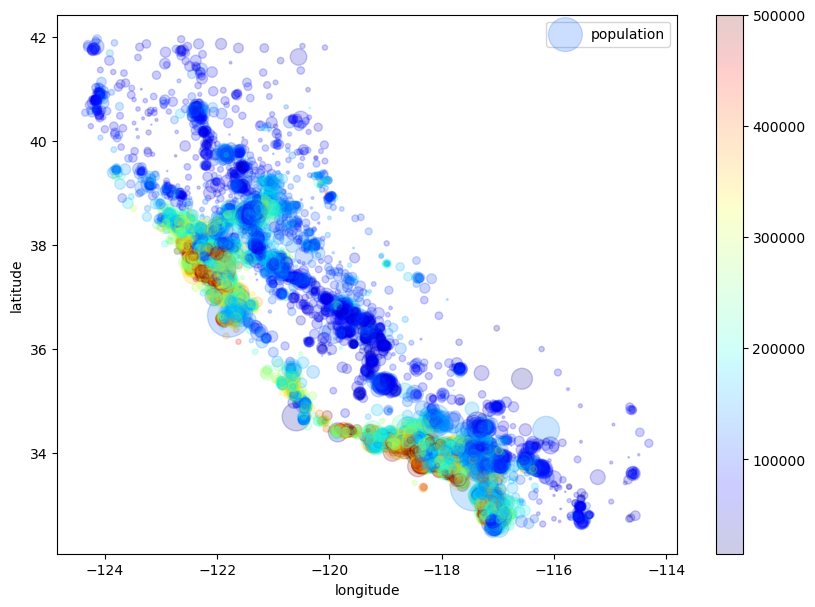

In [50]:
data = train_set.copy()
data.plot(kind="scatter", x="longitude", y="latitude",
          s=data["population"]/30, label="population",
          c=data["median_house_value"],cmap=plt.get_cmap("jet"),
          figsize=(10,7), alpha=0.2)

In [51]:
# standard correlation coefficient [-1, 1]
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687494
total_rooms           0.134106
housing_median_age    0.106131
households            0.065862
total_bedrooms        0.050760
population           -0.024666
longitude            -0.044722
latitude             -0.145104
Name: median_house_value, dtype: float64

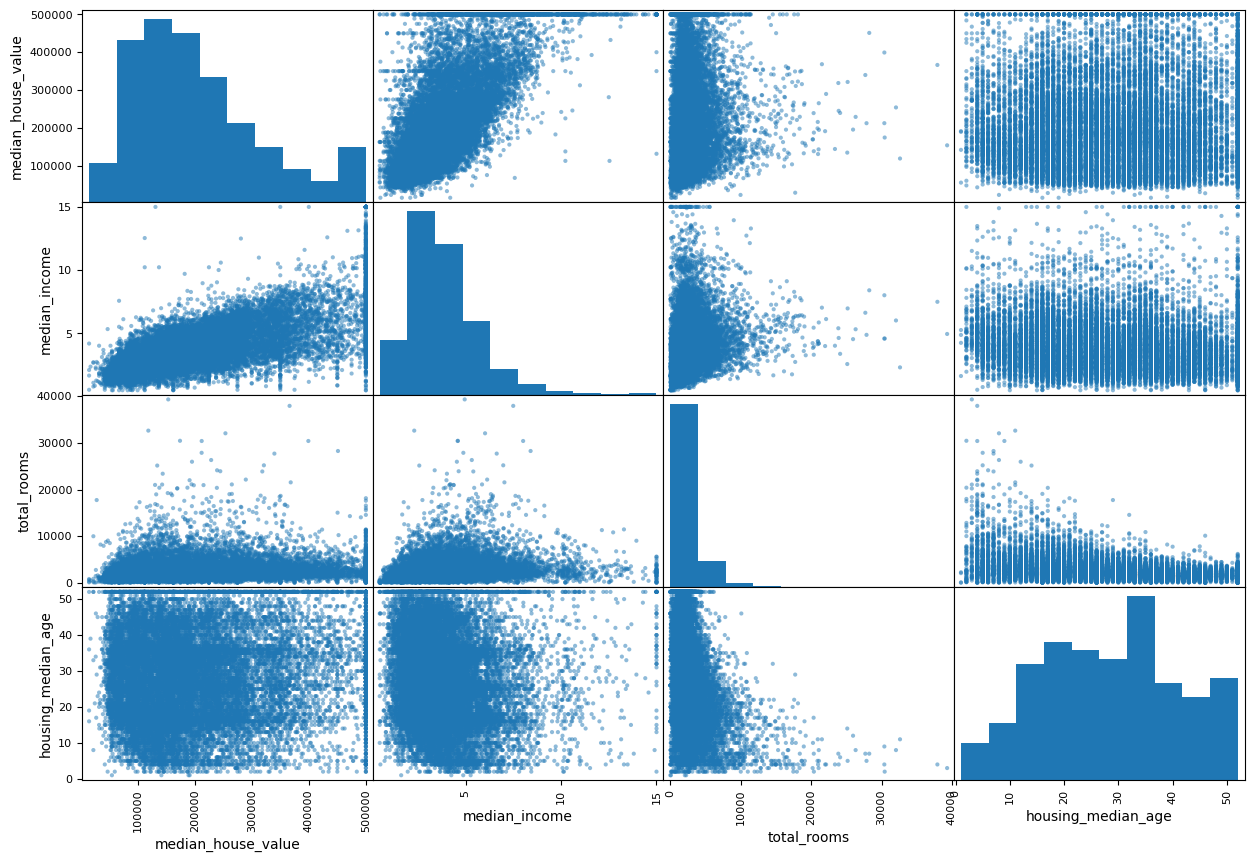

In [52]:
features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[features], figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

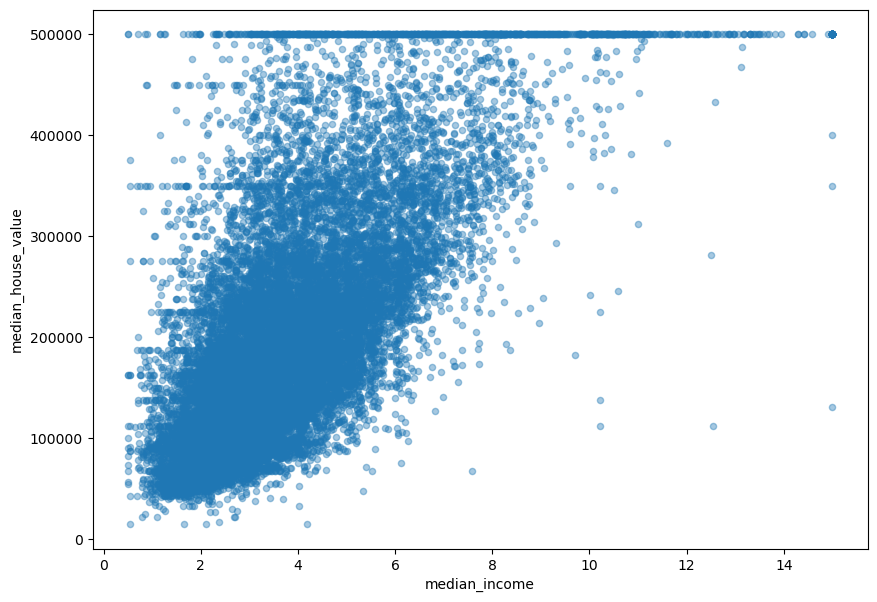

In [53]:
data.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(10,7), alpha=0.4)

In [54]:
data["total_rooms_per_households"] = data["total_rooms"]/data["households"]
data["total_bedrooms_per_total_rooms"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_households"] = data["population"]/data["households"]
data.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households
15062,-116.96,32.80,16.0,3920.0,1094.0,2612.0,1023.0,1.3291,120800.0,<1H OCEAN,3.831867,0.279082,2.553275
12973,-121.31,38.67,26.0,1387.0,226.0,807.0,244.0,4.1563,135700.0,INLAND,5.684426,0.162942,3.307377
3941,-118.59,34.21,34.0,2389.0,521.0,1560.0,514.0,4.8333,225400.0,<1H OCEAN,4.647860,0.218083,3.035019
4115,-118.42,34.14,27.0,3990.0,892.0,1417.0,800.0,4.0439,500001.0,<1H OCEAN,4.987500,0.223559,1.771250
3366,-120.49,40.31,16.0,1821.0,360.0,969.0,359.0,3.4643,85100.0,INLAND,5.072423,0.197694,2.699164
9022,-118.84,34.11,12.0,7508.0,1058.0,2484.0,965.0,5.8788,500001.0,NEAR OCEAN,7.780311,0.140916,2.574093
7438,-118.19,33.95,41.0,1368.0,309.0,1244.0,312.0,3.0833,164800.0,<1H OCEAN,4.384615,0.225877,3.987179
13003,-121.27,38.67,15.0,2116.0,524.0,866.0,519.0,2.7388,111600.0,INLAND,4.077071,0.247637,1.668593
12896,-121.34,38.64,12.0,2772.0,578.0,1335.0,565.0,3.8068,161000.0,INLAND,4.906195,0.208514,2.362832
1642,-121.78,37.97,4.0,17032.0,2546.0,7653.0,2359.0,5.5601,213700.0,INLAND,7.220008,0.149483,3.244171


In [55]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value                1.000000
median_income                     0.687494
total_rooms_per_households        0.149935
total_rooms                       0.134106
housing_median_age                0.106131
households                        0.065862
total_bedrooms                    0.050760
population_per_households        -0.023592
population                       -0.024666
longitude                        -0.044722
latitude                         -0.145104
total_bedrooms_per_total_rooms   -0.254735
Name: median_house_value, dtype: float64

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion                   
    
    
                    #============================ Prepare the data ==================================
                    #======================== Numerical data ===>>> missing values
                    #======================== Categorical and Text data ===>>> LabelEncoder, OneHotEncoder
                    #======================== Numerical data ===>>> Feature Scaling
                    #======================== Numerical data ===>>> Custom Transformers
                    #============================ SimpleImputer ====================================
                        
                        
df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis = 1)

df_num = df.drop("ocean_proximity", axis = 1)

#======= missing data (1.drop_rows, 2.drop_columns, 3.replace)
#df_num = df_num.dropna(subset=["total_bedrooms"])                # option 1
#df_num.drop("total_bedrooms", axis=1)                            # option 2
#median = df_num["total_bedrooms"].median()
#df_num["total_bedrooms"].fillna(median)                          # option 3

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df_num)
X = imputer.transform(df_num)
df_num_impute_tr = pd.DataFrame(X, columns=df_num.columns)
df_num_impute_tr.info()
df.info()
df_num_impute_tr.head()


                #=================================== Custom Transformers =============================
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def fit(self, X, y=None):
            return self
        def transform(self, X, y=None):
            rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
            population_per_household = X[:, population_ix] / X[:, household_ix]
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
custom = CombinedAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns = list(df_num_impute_tr.columns)
columns.append("rooms_per_household")
columns.append("population_per_household")
columns.append("bedrooms_per_room")
data_custom_tr.columns = columns
data_custom_tr.head(10)


                    #============================= Feature Scaling ================================
                                        # standardization   Normalization [0,1]

from sklearn.preprocessing import StandardScaler

feature_scal = StandardScaler()
data_num_scaled_tr = pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns=data_custom_tr.columns)
data_num_scaled_tr.head()



                            #=========================== LabelEncoder ======================================


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_cat = df["ocean_proximity"]
data_cat_encoded = encoder.fit_transform(data_cat)
data_cat_encoded = pd.DataFrame(data_cat_encoded, columns = ["ocean_proximity"])
data_cat_encoded.head()


                        #============================ OneHotEncoder ==================================


from sklearn.preprocessing import OneHotEncoder

encoder_1hot = OneHotEncoder(sparse=False)
data_cat_1hot_tmp = encoder_1hot.fit_transform(df[["ocean_proximity"]])
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp)
data_cat_1hot.columns = encoder_1hot.get_feature_names(['prox'])
                                                        
                                                        
final = pd.concat([data_num_scaled_tr, data_cat_1hot], axis=1)
final.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20227 entries, 0 to 20226
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20227 non-null  float64
 1   latitude            20227 non-null  float64
 2   housing_median_age  20227 non-null  float64
 3   total_rooms         20227 non-null  float64
 4   total_bedrooms      20227 non-null  float64
 5   population          20227 non-null  float64
 6   households          20227 non-null  float64
 7   median_income       20227 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20227 entries, 15062 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20227 non-null  float64
 1   latitude            20227 non-null  float64
 2   housing_median_age  20227 non-null  float64
 3   

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,1.304295,-1.327386,-1.002246,0.587321,1.320032,1.045264,1.367841,-1.341633,-0.642137,-0.049514,1.137711,1.0,0.0,0.0,0.0,0.0
1,-0.866589,1.419768,-0.208046,-0.572671,-0.741044,-0.545420,-0.668541,0.151465,0.101765,0.022369,-0.863596,0.0,1.0,0.0,0.0,0.0
2,0.490837,-0.667507,0.427314,-0.113803,-0.040563,0.118173,0.037265,0.509002,-0.314472,-0.003593,0.086590,1.0,0.0,0.0,0.0,0.0
3,0.575676,-0.700267,-0.128626,0.619378,0.840380,-0.007848,0.784897,0.092105,-0.178088,-0.124058,0.180952,1.0,0.0,0.0,0.0,0.0
4,-0.457365,2.187286,-1.002246,-0.373920,-0.422859,-0.402655,-0.367920,-0.213993,-0.143987,-0.035607,-0.264755,0.0,1.0,0.0,0.0,0.0
5,0.366074,-0.714307,-1.319926,2.230452,1.234549,0.932462,1.216223,1.061151,0.943374,-0.047529,-1.243132,0.0,0.0,0.0,0.0,1.0
6,0.690458,-0.789187,0.983254,-0.581372,-0.543959,-0.160307,-0.490782,-0.415206,-0.420179,0.087169,0.220901,1.0,0.0,0.0,0.0,0.0
7,-0.846627,1.419768,-1.081666,-0.238824,-0.033439,-0.493425,0.050336,-0.597144,-0.543674,-0.133843,0.595863,0.0,1.0,0.0,0.0,0.0
8,-0.881561,1.405728,-1.319926,0.061593,0.094784,-0.080112,0.170584,-0.033112,-0.210737,-0.067667,-0.078304,0.0,1.0,0.0,0.0,0.0
9,-1.101144,1.092168,-1.955286,6.591985,4.767821,5.487722,4.860275,0.892839,0.718383,0.016344,-1.095507,0.0,1.0,0.0,0.0,0.0


In [68]:

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def fit(self, X, y=None):
            return self
        def transform(self, X, y=None):
            rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
            population_per_household = X[:, population_ix] / X[:, household_ix]
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]


class DataFrameSelector(BaseEstimator, TransformerMixin):
        def __init__(self, attribute_names):
                  self.attribute_names = attribute_names
        def fit(self, X, y=None):
                  return self
        def transform(self, X):
                  return X[self.attribute_names].values

df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis = 1)

df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis=1)

df_num = df.drop(["ocean_proximity"], axis=1)
num_attrs = list(df_num)
cat_attrs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median' )),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrs)),
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
    ])    

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ])




housing_prepared = full_pipeline.fit_transform(df)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                                               'toatal_bedrroms', 'population', 'households', 'median_income',
                                                                'rooms_per_household', 'population_perhousehold',
                                                                'bedrooms_per_room', 'prox_<1H OCEAN', 'prox_INLAND',
                                                                'prox_ISLAND', 'prox_NEAR BAY', 'prox_NEAR OCEAN'])

housing_prepared_df.head()


,longitude,latitude,housing_median_age,total_rooms,toatal_bedrroms,population,households,median_income,rooms_per_household,population_perhousehold,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,1.304295,-1.327386,-1.002246,0.587321,1.320032,1.045264,1.367841,-1.341633,-0.642137,-0.049514,1.137711,1.0,0.0,0.0,0.0,0.0
1,-0.866589,1.419768,-0.208046,-0.572671,-0.741044,-0.545420,-0.668541,0.151465,0.101765,0.022369,-0.863596,0.0,1.0,0.0,0.0,0.0
2,0.490837,-0.667507,0.427314,-0.113803,-0.040563,0.118173,0.037265,0.509002,-0.314472,-0.003593,0.086590,1.0,0.0,0.0,0.0,0.0
3,0.575676,-0.700267,-0.128626,0.619378,0.840380,-0.007848,0.784897,0.092105,-0.178088,-0.124058,0.180952,1.0,0.0,0.0,0.0,0.0
4,-0.457365,2.187286,-1.002246,-0.373920,-0.422859,-0.402655,-0.367920,-0.213993,-0.143987,-0.035607,-0.264755,0.0,1.0,0.0,0.0,0.0


In [71]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df, df_label)

sample_data_prepared = housing_prepared_df.iloc[:4]
print("Predictions:\t", lin_reg.predict(sample_data_prepared))

sample_labels = df_label.iloc[:4]
print("Labels:\t\t", list(sample_labels))

Predictions:	 [132194.26638466 138539.60435023 268196.20122969 272092.35628705]
Labels:		 [120800.0, 135700.0, 225400.0, 500001.0]


In [73]:
from sklearn.metrics import mean_squared_error

#  RMSE ==> Root Mean Squared Error
housing_predictions = lin_reg.predict(housing_prepared_df)
lin_mse = mean_squared_error(df_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67919.70536607917

In [75]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df, df_label)
housing_predictions = tree_reg.predict(housing_prepared_df)
tree_mse = mean_squared_error(df_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

In [77]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared_df, df_label, scoring="neg_mean_squared_error", cv=10 )
trees_rmse_scores = np.sqrt(-scores)

def display_scores(scores, model_name):
    print("==============", model_name, "==============") 
    print("Scores:", scores) 
    print("Mean:", scores.mean()) 
    print("Standard deviation:", scores.std()) 
    print("======================================================================================")



display_scores(trees_rmse_scores, "Decision Tree Regression") 


============== Decision Tree Regression ==============
Scores: [66443.21727489 63055.60413709 70081.63261299 69437.10569003
 70435.5711448  69128.40877451 65393.11525177 65372.49975617
 68300.18640132 71117.32075875]
Mean: 67876.46618023116
Standard deviation: 2526.444207380797


In [78]:
linear_scores = cross_val_score(lin_reg, housing_prepared_df, df_label, scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores, "Linear Regression")


============== Linear Regression ==============
Scores: [70162.15898922 67826.17493725 66242.97360106 69839.35799438
 66943.40979569 67503.89448856 66834.29732753 65062.47062072
 69108.32236155 72610.88831253]
Mean: 68213.39484285009
Standard deviation: 2110.906612249507


In [79]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_df, df_label)
forest_scores = cross_val_score(forest_reg, housing_prepared_df, df_label, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores, "Random Forest Regression")

============== Random Forest Regression ==============
Scores: [50306.71434338 48385.20026808 47681.5301279  50938.03135054
 50491.84314103 50635.38716265 48029.77976432 46041.65021386
 49773.30951546 49937.58152521]
Mean: 49222.10274124126
Standard deviation: 1521.736762498787
